<a href="https://colab.research.google.com/github/PrinceRaj1161/Machine-learning/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Data Collection.
    o	Collect the dataset or Create the dataset
•	Data Preprocessing.
    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o-	Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test.
•	Model Building
    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model
    """

'\nData Collection.\n    o\tCollect the dataset or Create the dataset\n•\tData Preprocessing.\n    o\tImport the Libraries.\n    o\tImporting the dataset.\n    o\tChecking for Null Values.\n    o\tData Visualization.\n    o\tOutlier Detection\n    o\tSplitting Dependent and Independent variables\n    o-\tEncoding\n    o\tFeature Scaling.\n    o\tSplitting Data into Train and Test.\n•\tModel Building\n    o\tImport the model building Libraries\n    o\tInitializing the model\n    o\tTraining and testing the model\n    o\tEvaluation of Model\n    o\tSave the Model\n    '

# Data Processing

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import DataSet

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Checking Null Values

In [8]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Data Visualization

<Axes: xlabel='Age', ylabel='Count'>

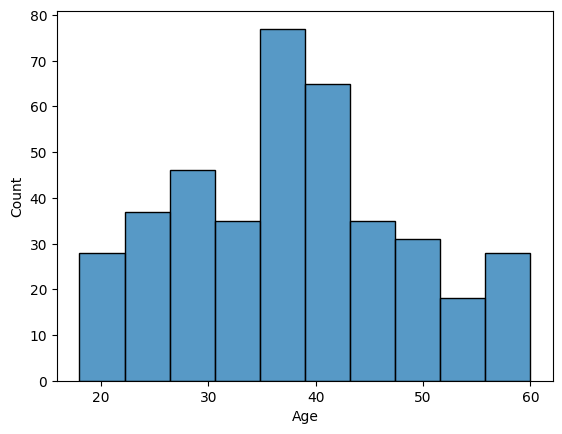

In [10]:
sns.histplot(df["Age"])

<ipython-input-11-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

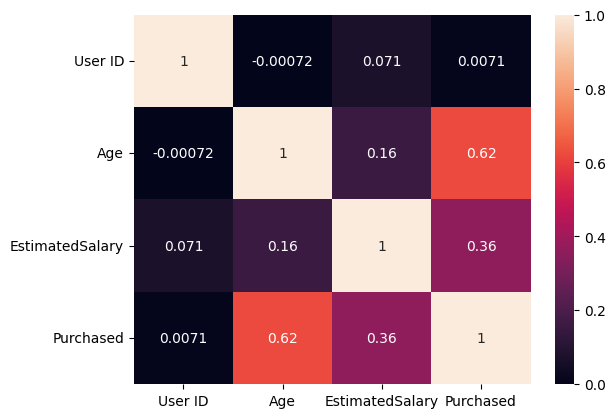

In [11]:
sns.heatmap(df.corr(),annot=True)

## Outlier Detection

<Axes: >

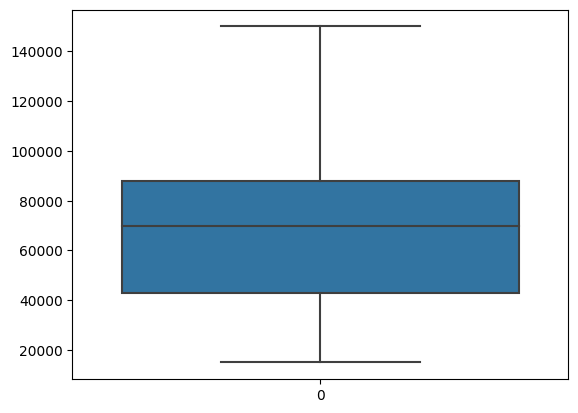

In [12]:
sns.boxplot(df.EstimatedSalary)

<Axes: >

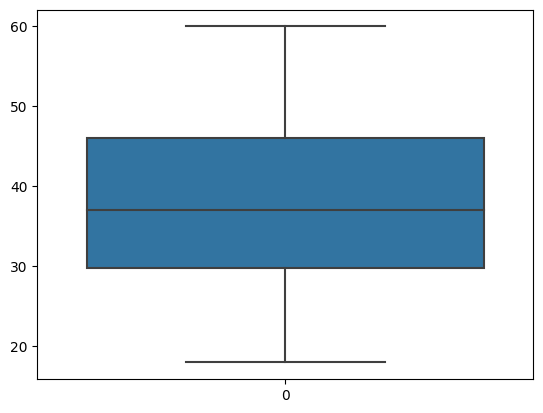

In [13]:
sns.boxplot(df.Age)

## Spliting Data into Independent and Dependent Variable

In [14]:
X = df.iloc[:,1:4]
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [15]:
Y = df['Purchased']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
X['Gender']=le.fit_transform(X.Gender)
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


## Feature Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_scaled = pd.DataFrame(ms.fit_transform(X),columns=X.columns)
X_scaled.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


## Spliting Data into Train and Test

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=0)

In [21]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((320, 3), (80, 3), (320,), (80,))

# Model building

In [23]:
from sklearn.svm import SVC
mod = SVC(probability=True)

In [26]:
rand_list = {"C": [2,3,5,6,7,8,10],
             "gamma" : [0.1,0.2,0.5,0.4,0.8]}

In [27]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(mod,param_distributions=rand_list,n_iter=20,cv=5)

In [29]:
rand_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_iter=20,
                   param_distributions={'C': [2, 3, 5, 6, 7, 8, 10],
                                        'gamma': [0.1, 0.2, 0.5, 0.4, 0.8]})

In [30]:
Y_pred= rand_search.predict(X_test)

In [31]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [32]:
rand_search.predict(ms.transform([[1,19,19000]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
accuracy_score(Y_test,Y_pred)

0.95

In [35]:
pd.crosstab(Y_test,Y_pred)

col_0,0,1
Purchased,,
0,56,2
1,2,20


In [36]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [37]:
probability=rand_search.predict_proba(X_test)[:,1]

In [38]:
probability

array([0.09860369, 0.092386  , 0.08004823, 0.04830078, 0.05274191,
       0.01223301, 0.08506161, 0.9953694 , 0.02816479, 0.66801685,
       0.01204652, 0.01977002, 0.0608001 , 0.19566952, 0.06940729,
       0.51120085, 0.13150498, 0.06604613, 0.9738529 , 0.06148439,
       0.05485537, 0.97368224, 0.17447239, 0.93280423, 0.0198152 ,
       0.97259444, 0.06526845, 0.05128329, 0.07252841, 0.07869286,
       0.0816535 , 0.14745205, 0.98634829, 0.05919206, 0.00850208,
       0.00703741, 0.04218189, 0.04875702, 0.0368564 , 0.802728  ,
       0.08713677, 0.16723119, 0.0546626 , 0.06799438, 0.66517024,
       0.01908965, 0.10790932, 0.81558956, 0.00751923, 0.87379374,
       0.97235358, 0.08762723, 0.05123226, 0.8069996 , 0.96179541,
       0.57245841, 0.0560979 , 0.04195893, 0.89182228, 0.007835  ,
       0.03627508, 0.9972198 , 0.0297458 , 0.45397503, 0.02009858,
       0.9950249 , 0.07115779, 0.01043783, 0.12788369, 0.20435885,
       0.97052014, 0.07279398, 0.01921339, 0.69128621, 0.09583

In [39]:
from sklearn.metrics import roc_auc_score,roc_curve

In [40]:
fpr,tpr,tres = roc_curve(Y_test,probability)

<function matplotlib.pyplot.show(close=None, block=None)>

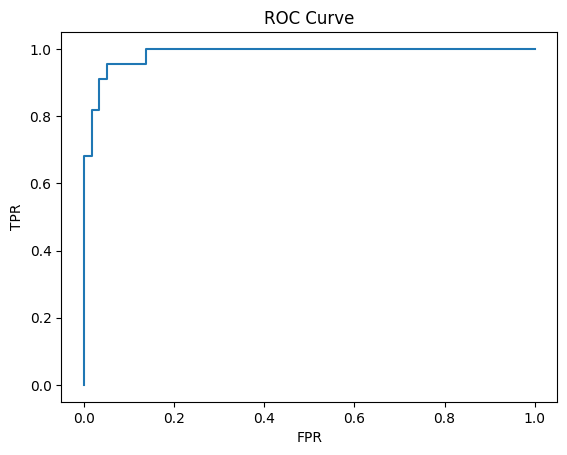

In [41]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show